In [20]:
# Read in CSVs

import pandas as pd

# Read in the CSVs
df_human = pd.read_csv('manual_sentiment.csv')
df_open_source = pd.read_csv('sentiment_scores_open_source_LLMs_n1000.csv')
df_gpt = pd.read_csv('sentiment_scores_GPT4o.csv')

# Merge the two dataframes
df = pd.merge(df_open_source, df_human, on='Document', how='left')
df = pd.merge(df, df_gpt, on='Document', how='left')

# Drop Unamed:4, Unnamed:5, and Unnamed:6 and scorer columns
df = df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'scorer'], axis=1)

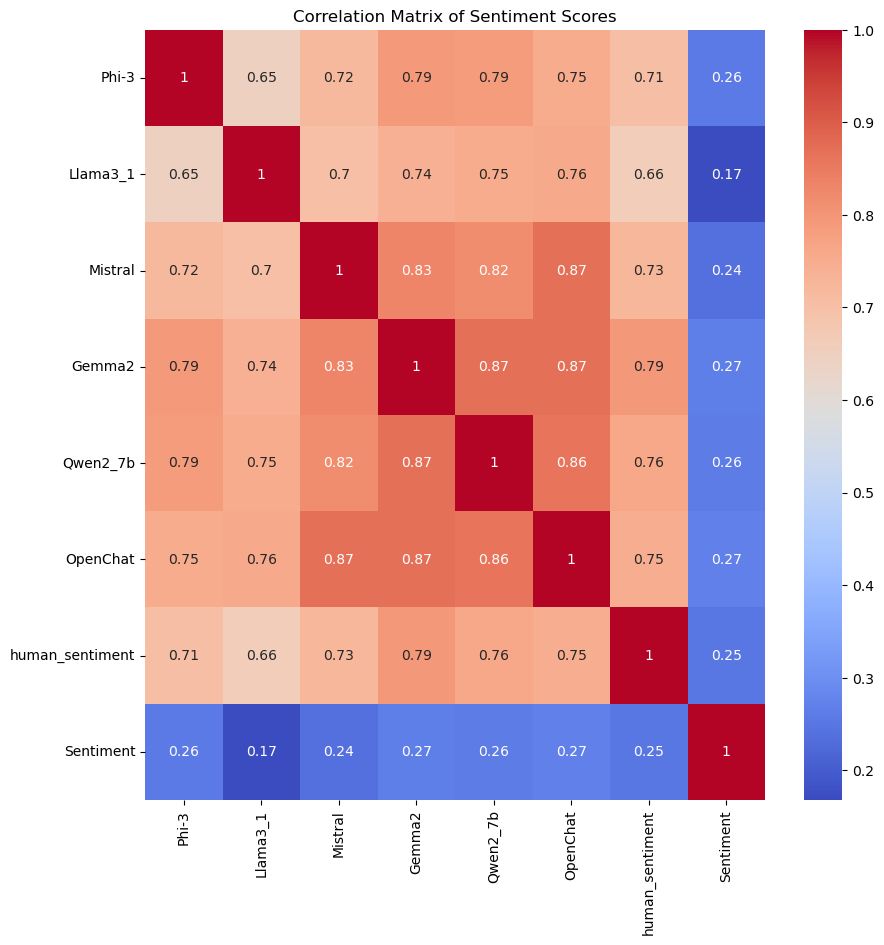

In [24]:
# Keep just sentiment scores from all the models
df_sentiments = df.drop(['Document', 'Document Content_x', 'Document Content_y', 'file_names', 'Full Result'], axis=1)

# Calculate correlation matrix
df_sentiments.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df_sentiments.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sentiment Scores')
plt.show()